Build a simple linear regression model by performing EDA and do necessary transformations and 
select the best model using R or Python.
1) Delivery_time -> Predict delivery time using sorting time

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info() #data has No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Rename the data_set as they are having space in the column name 

In [5]:
data_1 = data.copy() # Making copy of data so original data sholud not lose
data_1 = data.rename(columns={"Delivery Time":"DT","Sorting Time":"ST"})
data_1.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


check the lenearality between DT & ST

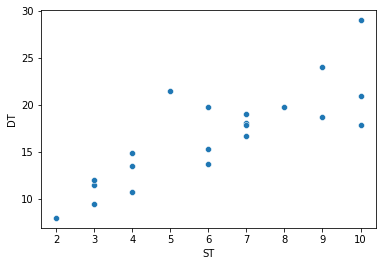

In [6]:
sns.scatterplot(x=data_1["ST"],y=data_1["DT"]) # Some Lenearity is there between ST & DT
plt.show()

Checking Correlation

In [7]:
data_1.corr()  

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


r = 0.82 tells some what good relation of lenearity 

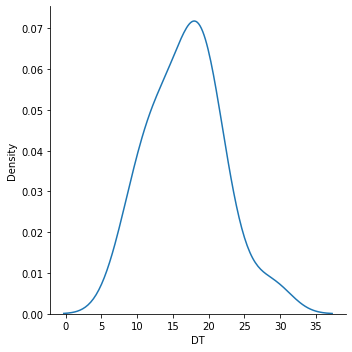

In [8]:
sns.displot(x=data_1["DT"],kind="kde") #to check How data is Distributed
plt.show()

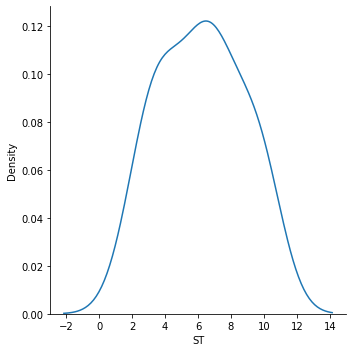

In [9]:
sns.displot(x=data_1["ST"],kind="kde") #to check How data is Distributed
plt.show()

# Creating the Model

In [10]:
model = smf.ols("DT~ST",data=data_1) #Create the model
model = model.fit() #Train the model

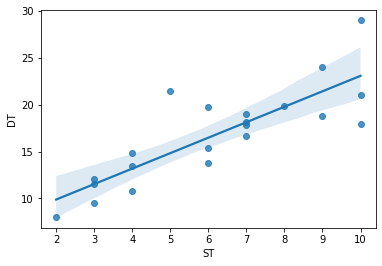

In [11]:
sns.regplot(x="ST",y="DT",data=data_1) #Regrestion Line 
plt.show()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           3.98e-06
Time:                        13:45:35   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model.rsquared # Model can explain upto 68%, to be good model 0.85 is recommended 

0.6822714748417231

In [14]:
model.params #to check coef of Intercept(Bita0) & coeff of DT (Bita1) 

Intercept    6.582734
ST           1.649020
dtype: float64

In [15]:
model.pvalues # as pvalue is almost 0 DT is good predictor for ST

Intercept    0.001147
ST           0.000004
dtype: float64

# Prediction for new ST

In [16]:
new_st = pd.DataFrame(pd.Series([11,7]),columns=["ST"])

In [17]:
model.predict(new_st)

0    24.721953
1    18.125873
dtype: float64

* For 11 Sorting time , 24.72 will be the Delivery time
* For 7 Sorthing time, 18.12 will be the Delivery time